# CFD from scratch


* Governing equations
* Pressure
* Finite volume formulation
* Implementation

## Governing Equations

### Reynolds transport theorem (RTT)

* The RTT connects a Lagrangian system with an Eulerian control volume. 
    * By Lagrangian system, we mean a system of a given specified mass, or a *marked mass*.
* Conservation laws are written in terms of Lagrangian systems, but we solve CFD problems on Eulerian domains. The RTT connects these.

<img src="rtt.png" width="350"/>

* The RTT is written as

$$\underbrace{\frac{dB_{sys}}{dt}}_{\text{Lagrangian system}} = \underbrace{\frac{d}{dt}\int_V\rho\beta dV + \int_A\rho\beta\vec{v}\cdot\vec{n}dA}_{\text{Eulerian control volume}}.$$

* $B_{sys}$ is some extensive quantity, like mass, momentum, or energy.
* $\beta = B_{sys}/m$ is intensive.
* $\rho\beta$ will be mass, momentum, energy, etc. per unit volume.
* $\rho\beta\vec{v}$ is $B$-flux, like mass flux, momentum flux, energy flux.
* $\vec{n}$ is a unit normal vector pointing *out* of the surface of a control volume. 
* In an area dA, $\rho\beta\vec{v}\cdot\vec{n}dA$ will be rate of B flowing out of a control volume through that area dA. 

### Mass

* $B_{sys} = m$
* $\beta = B_{sys}/m = 1$.
* Lagrangian conservation law: mass is conserved, or the rate of change of a given mass is zero:
$$\frac{dm}{dt} = 0.$$
* Substitute into the RTT and swap the right and left sides of the equality:
<font color="blue">
$$\frac{d}{dt}\int_V\rho dV + \int_A\rho\vec{v}\cdot\vec{n}dA = 0.$$
</font>

### Momentum
* $B_{sys} = m\vec{v}$
* $\beta = B_{sys}/m = \vec{v}$
* Lagrangian conservation law: the rate of change of momentum of a fixed mass (system) is the sum of the external forces on the mass (system).
    * We have surface forces $\vec{F}$, and body forces (denoted with external field $\vec{g}$, nominally gravitational acceleration):
$$\frac{dm\vec{v}}{dt} = \int_A \vec{F}dA + \int_V\vec{g}\rho dV.$$
    * Consider viscous and pressure forces, so that $\vec{F} = -\boldsymbol{\tau}\cdot\vec{n} - P\boldsymbol{\delta}\cdot{\vec{n}}$, where $\boldsymbol{\tau}$ is the viscous stress tensor, and $\boldsymbol{\delta}$ is the unit tensor. 
        * (The negative sign is because $\vec{n}$ points *out* of the suface, and we want the force on or into the surface.) 
    * This gives
$$\frac{dm\vec{v}}{dt} = -\int_A\boldsymbol{\tau}\cdot\vec{n}dA -\int_AP\boldsymbol{\delta}\cdot\vec{n}dA+ \int_V\vec{g}\rho dV.$$
* Substitute into the RTT and swap the right and left sides of the equality:
<font color="blue">
$$\frac{d}{dt}\int_V\rho\vec{v}dV + \int_A\rho\vec{v}\vec{v}\cdot\vec{n}dA = -\int_A\boldsymbol{\tau}\cdot\vec{n}dA -\int_AP\boldsymbol{\delta}\cdot\vec{n}dA+ \int_V\vec{g}\rho dV.$$
</font>
* Here, $\vec{v}\vec{v}$ is a tensor, and can be written as $\vec{v}\otimes\vec{v}$, or $v_iv_j$ in index notation.

### Energy
* $B_{sys} = E$ (where $E = mu + \frac{1}{2}m\vec{v}\cdot\vec{v}$ is internal + kinetic energy).
* $\beta = E/m = e$.
* Lagrangian conservation law: the rate of change of energy of a given mass is the sum of the heat transfered to the mass and the work performed on the mass:
$$\frac{dE}{dt} = -\int_A\vec{q}\cdot\vec{n}dA + \int_A\vec{F}\cdot\vec{v}dA + \int_V\rho\vec{g}\cdot\vec{v}dV.$$
    * Here, $\vec{q}$ is the heat flux vector. As before, $\vec{F} = -\boldsymbol{\tau}\cdot\vec{n} - P\boldsymbol{\delta}\cdot{\vec{n}}$. 
    * The symmetry of $\boldsymbol{\tau}$ and $\boldsymbol{\delta}$ let us write $\boldsymbol{\tau}\cdot\vec{n}\cdot\vec{v} = \boldsymbol{\tau}\cdot\vec{v}\cdot\vec{n}$ and $P\boldsymbol{\delta}\cdot\vec{n}\cdot\vec{v} = P\boldsymbol{\delta}\cdot\vec{v}\cdot\vec{n}$.
* Substitute into the RTT and swap the right and left sides of the equality:
<font color="blue">
$$\frac{d}{dt}\int_V\rho edV + \int_A\rho e\vec{v}\cdot\vec{n}dA = 
-\int_A\vec{q}\cdot\vec{n}dA - \int_A(\boldsymbol{\tau}\cdot\vec{v})\cdot\vec{n}dA - \int_A(P\boldsymbol{\delta}\cdot\vec{v})\cdot\vec{n}dA+ \int_V\rho\vec{g}\cdot\vec{v}dV.$$
</font>

### Equation of state and constitutive relations
* The above (blue) equations for mass, momentum and energy are three equations in $\rho$, $\vec{v}$ and $e$.
* An equation of state is used to relate these quantities to pressure $P$.
    * For, example, the ideal gas law:
$$P = \frac{\rho R T}{M}$$
    * Here, $R$ is the universal gas constant, $M$ is the mean molecular weight, and $T$ is temperature.
* Thermodynamic relations will relate $T$ to $e$, $\vec{v}$, and $P$. For ideal gases, $T$ is a function of internal energy $e-\frac{1}{2}\vec{v}\cdot\vec{v}$.
* Consitutive relations are also required to write $\vec{q}$, and $\boldsymbol{\tau}$ in terms of $\rho$, $\vec{v}$, $e$, $P$.

### Differential form

* The above equations are in integral form, which is convenient for a Finite Volume solution. (It is also convenient for derivation.)
* We can find the differential form as follows.
    * If the control volume is fixed in time, we can move $d/dt$ inside the volume integral.
    * Replace integrals over the surface area with volume integrals by applying the Gauss Divergence Theorem:
    $$\int_A\vec{v}\cdot\vec{n}dA = \int_V\nabla\cdot\vec{v},$$
    where $\vec{v}$ is some vector (not necessarily velocity).
        * Hence, in the equation for mass we have $\int_A\rho\vec{v}\cdot\vec{n}dA = \int_V\nabla\cdot(\rho\vec{v})dV$.
    * Combine all the volume integrals into $\int_V(\text{all terms})dV = 0$. Since the volume integrated over is arbitrary, this equation can only be true if the integrand $(\text{all terms})$ itself is 0. This gives the final result. (Also, $\nabla\cdot(P\boldsymbol{\delta}) = \nabla P$.)
    
\begin{align}
\text{mass:} \phantom{xxxx}& \frac{d\rho}{dt} + \nabla\cdot(\rho\vec{v}) = 0\\
\text{momentum:}\phantom{xxxx} & \frac{d\rho\vec{v}}{dt} + \nabla\cdot(\rho\vec{v}\vec{v}) = -\underbrace{\nabla\cdot\boldsymbol{\tau}}_{\text{viscous forces}} - \underbrace{\nabla P}_{\text{pressure forces}} + \underbrace{\rho\vec{g}}_{\text{gravitational forces}} \\
\text{energy:}\phantom{xxxx} & \frac{d\rho e}{dt} + \nabla\cdot(\rho e\vec{v}) = -\underbrace{\nabla\cdot\vec{q}}_{\text{heat flux}} - \underbrace{\nabla\cdot(\boldsymbol{\tau}\cdot\vec{v})}_{\text{viscous heating}} -\underbrace{\nabla\cdot(P\vec{v})}_{\text{PV work}} + \underbrace{\rho\vec{g}\cdot\vec{v}}_{\text{field work}}
\end{align}

* The terms on the left hand side (LHS) of the equation are the accumulation and in/out transport through the control volume.
* The terms on the right hand side (RHS) are as noted. In the energy equation, field work will convert potential energy to kinetic energy (which is part of $e$).

## Pressure and compressibility
* The governing equations, along with equation of state and constitutive, define the system. 
    * Oh, and boundary conditions too, don't forget those.
* These are the compressible flow equations. 
* Pressure waves will be part of the solution.
* Those waves travel at the sound speed (347 m/s in at at 1 atm, 300 K). 
* If we are at low speed relative to the acoustic waves (low Mach), then the flow is largely unimpacted by these waves and we call the flow incompressible.
    * From the Bernoulli equation, ignoring gravity, we have
    $$\Delta P = \frac{\rho\Delta v^2}{2}.$$
    * Take pressures relative to stagnation, so $\Delta v=v$ (most flows have $v=0$ somewhere). Using $c^2=\gamma P/\rho$, where $\gamma = c_p/c_v$, and $Ma = v/c$, we have
    $$\frac{\Delta P}{P} = \frac{\gamma}{2}Ma^2.$$
    * For v=100 m/s, $\Delta P/P_{atm}$ is 6%. (100 m/s is 233 mph and gives Ma=0.288 for air at 1 atm.)
    * For v=347 m/s, $\Delta P/P_{atm}$ is 70%. (347 m/s is 776 mph and gives Ma=1 for air at 1 atm.)
* Flows are often considered incompressible for $Ma<0.3$.
* Flows can have large density changes and still be considered incompressible. Heat release and chemical mixing in gases can cause large density variations, but at low speed, the changes in velocity themselves only slightly compress the fluid.

#### Low-Mach flows
* At low speeds, acoustic waves do not alter the thermodynamic state or affect the velocity fields. 
* But for unsteady, explicit flow solvers, we are required to take timesteps based on the smallest timescales. Here, those correspond to acoustic waves, or rather, $v+c$. 
* This is a numerically *stiff* problem: we have to take timesteps for stability that are much smaller than we need for accuracy (for capturing the relevant physics, of which acoustics don't contribute.)
    * The ratio of the number of timesteps needed for stability to the ideal number for accuracy is $(v+c)/v = 1+1/Ma$. 
        * This is based on a CFL condition: accurate timestep sizes will be smaller than the convective time across a given grid cell: $\Delta t < \alpha\Delta x/v$ for accuracy, but $\Delta t < \alpha\Delta x/(v+c)$ for stability, where $\alpha$ is a constant (the CFL) determined by the method used. 
    * At Ma=0.1 (34.7 m/s or 77.6 mph in air at 1 atm, 300 K), we would need 11 times more steps for a stable solution than we need for an acurate solution. 



## Incompressible flow
* The numerical stiffness for low-Mach flows can be explicitly removed from the equations by assuming the flow is incompressible and using a so-called pressure projection method.
* The density is assumed constant, and the energy equation is no longer needed.
* The resulting equations, ignoring gravity, and taking $\hat{\tau}=\tau/\rho$, and $\hat{P} = P/\rho$ are
<font color="blue">
\begin{align}
\text{mass:}\phantom{xxxx} & \int_A\vec{v}\cdot\vec{n}dA = 0 \\
\text{momentum:}\phantom{xxxx} & \frac{d}{dt}\int_V\vec{v}dV + \int_A\vec{v}\vec{v}\cdot\vec{n}dA = -\int_A\hat{\boldsymbol{\tau}}\cdot\vec{n}dA -\int_A\hat{P}\boldsymbol{\delta}\cdot\vec{n}dA.
\end{align}
</font>
* These are two equations in $\vec{v}$ and $P$. 
* The momentum equation gives the equation for $\vec{v}$, but there is no explicit pressure equation. The mass equation (continuity) provides a constraint on the velocities.
* Pressure can be thought of as a scalar field that constrains velocity components given by the momentum equation to satisfy continuity.
* A pressure equation is derived by effectively taking the divergence of the momentum equation. 

### Pressure equation
* Consider the differential form of the mass and momentum equations, where we drop the vector arrows for simplicity:
\begin{align}
\text{mass:}\phantom{xxxx} & \nabla\cdot v = 0 \\
\text{momentum:}\phantom{xxxx} & \frac{dv}{dt} = -\nabla\cdot vv - \nabla\cdot\hat{\boldsymbol{\tau}} - \nabla\hat{P}
\end{align}
* Apply a simple Explicit Euler integration over one timestep $h=\Delta t$ to the momentum equation:
$$v^{n+1} = \underbrace{v^n + h\left(-\nabla\cdot vv-\nabla\cdot\hat{\boldsymbol{\tau}}\right)^n}_{H^n}-h\nabla\hat{P}^{n+1}.$$
    * Note that $\hat{P}$ is taken at step $n+1$ (keep reading).
* We use $\nabla\cdot v=0$ applied to this $v^{n+1}$ equation to get an equation for $\hat{P}^{n+1}$:
<font color="blue">
$$\nabla^2\hat{P}^{n+1} = \frac{1}{h}\nabla\cdot H^n.$$
</font>
* **To advance a given step, we solve this equation for $\hat{P}$, and then use this in the momentum advancement equation for $v^{n+1}$ above:**
<font color="blue">
$$v^{n+1} = H^n - h\nabla\hat{P}^{n+1}.$$
</font>
* This velocity satisfies continuity by construction.

**In practice, the pressure equation is determined from the discretized version of the momentum and continuity equations, discussed later.**

#### Boundary conditions for the pressure equation
* The pressure equation requires boundary conditions. These are best determined from the momentum equations evaluated on the boundary. 
* There appears to be ongoing discussion of the boundary condition treatment for the pressure equation. See for example 
    * [Vremen 2014](https://linkinghub.elsevier.com/retrieve/pii/S002199911400062X)
    * [Rempfer 2003](https://www.annualreviews.org/doi/abs/10.1146/annurev.fluid.35.030602.113908?journalCode=fluid)
    * [Sani 2006](https://onlinelibrary.wiley.com/doi/10.1002/fld.1062)
        * Along with [some comentantary by Rempfer](https://onlinelibrary.wiley.com/doi/pdf/10.1002/fld.1750)
        * And a [reply by Sani](https://onlinelibrary.wiley.com/doi/pdf/10.1002/fld.1762)
* In my opinion, the pressure treatment is not so complicated. The simplicity of inserting the velocities into the continuity equation, with boundary velocities taken along for the ride, is pretty straightforward. Pressure boundary conditions are effectively built-in. See below.        
    


## Numerical Solution-Finite Volume Method

* To solve the above equations, we'll use a finite volume method. 
* Assume a 2-dimensional rectangular domain. 
    * We divide the domain into grid cells of size $\Delta x$ by $\Delta y$. 
    * $\Delta x\Delta y$ is the volume of a grid cell.
    * Cell face areas are $\Delta x$ and $\Delta y$.
<img src="fig_1.png" width="250"/>
    * cell faces are labeled as e, w, n, s for east, west, north, and south, respectively.
    * The x-direction (horizontal) is indexed with *i* and the y direction (vertical) is indexed with $j$.
* We assume all properties are uniform inside a given cell, and we assume all properties are uniform along a given face.
    * With these two assumptions, we integrate the mass and momentum equations over a given cell.

### Momentum components
\begin{align}
\text{u-mom:}\phantom{xxxx}&\frac{d}{dt}\int_VudV + \int_Au\vec{v}\cdot\vec{n}dA = -\int_A\hat{\boldsymbol{\tau}}_x\cdot\vec{n}dA -\int_A\hat{P}\vec{i}\cdot\vec{n}dA, \\
\text{v-mom:}\phantom{xxxx}&\frac{d}{dt}\int_VvdV + \int_Av\vec{v}\cdot\vec{n}dA = -\int_A\hat{\boldsymbol{\tau}}_y\cdot\vec{n}dA -\int_A\hat{P}\vec{j}\cdot\vec{n}dA.
\end{align}
Here, $\vec{i}$ and $\vec{j}$ are the unit coordinate vectors in the $x$ and $y$ directions, respectively.

Integrate the u-mom equation over a given grid cell.
* The first term is
$$\frac{d}{dt}\int_VudV \rightarrow \frac{d}{dt}u\int_VdV = \frac{duV}{dt} = \frac{du\Delta x\Delta y}{dt} = \Delta x\Delta y\frac{du}{dt}.$$
* The area integrals are illustrated considering the second term, where $\vec{n}=\pm\vec{i}$ or $\vec{n}=\pm\vec{j}$:

\begin{align}
\int_Au\vec{v}\cdot\vec{n}dA &= 
\int_{A_e}u\vec{v}\cdot\vec{i}dA - 
\int_{A_w}u\vec{v}\cdot\vec{i}dA + 
\int_{A_n}u\vec{v}\cdot\vec{j}dA - 
\int_{A_s}u\vec{v}\cdot\vec{j}dA \\
&= u_eu_e\Delta y - u_wu_w\Delta y + u_nv_n\Delta x - u_sv_s\Delta x.
\end{align}

* Considering all terms in the u-mom equation and dividing through by $\Delta x\Delta y$ gives

$$\frac{du}{dt} = -\frac{u_eu_e - u_wu_w}{\Delta x} - \frac{u_nv_n - u_sv_s}{\Delta y}
- \frac{\hat{\tau}_{xx,e}-\hat{\tau}_{xx,w}}{\Delta x} 
- \frac{\hat{\tau}_{xy,n}-\hat{\tau}_{xy,s}}{\Delta y}
- \frac{\hat{P}_e-\hat{P}_w}{\Delta x}$$

* The quantities at faces interpolated between values at neighboring cells.


### Checkerboarding
* Consider in particular the face pressures:
$$\hat{P}_e = \frac{\hat{P}_{i+1,j}+\hat{P}_{i,j}}{2},$$
$$\hat{P}_w = \frac{\hat{P}_{i,j}+\hat{P}_{i-1,j}}{2}.$$
* Inserting these into the u-mom equation gives:
$$-\frac{\hat{P}_e-\hat{P}_w}{\Delta x} = -\frac{\hat{P}_{i+1,j}+\hat{P}_{i,j}-\hat{P}_{i,j}-\hat{P}_{i-1,j}}{2\Delta x} = -\frac{\hat{P}_{i+1,j}-\hat{P}_{i-1,j}}{2\Delta x}.$$
* Note that for the given *i,j* cell, $u_{i,j}$ depends on the two neighboring pressures, but not on $\hat{P}_{i,j}$.
* This effectively decouples $u$ from $\hat{P}$.
* Consider a one-dimensional grid with the following pressure values

```
|  8  |  2  |  8  |  2  |  8  |
```

* For any given cell, pressure term will cancel since (8-8)=0 and (2-2)=0. Hence, this pressure field will not affect the velocity. 
* This is clearly unphysical since there is an alternative pressure gradient that should drive velocity.
* In two dimensions, we could have something like:

```
|-----|-----|-----|-----|-----|
|  8  |  2  |  8  |  2  |  8  |
|-----|-----|-----|-----|-----|
|  6  |  4  |  6  |  4  |  6  |
|-----|-----|-----|-----|-----|
|  8  |  2  |  8  |  2  |  8  |
|-----|-----|-----|-----|-----|
|  6  |  4  |  6  |  4  |  6  |
|-----|-----|-----|-----|-----|
|  8  |  2  |  8  |  2  |  8  |
|-----|-----|-----|-----|-----|
```



### Staggered grid
* The decoupling of velocity and pressure can cause instability. Numerical error/noise can be preserved and amplified.
* To remedy this, a staggered grid is used.
    * A u-grid is formed by shifting all grid cells left by half a cell.
        * u-velocity components are stored at the cell centers of this shifted u-grid.
        * The u-momentum equation is integrated over the u-cells.
    * A v-grid is formed by shifting all grid cells down by half a cell
        * v-velocity components are stored at the cell centers of this shifted v-grid.
        * The v-momentum equation is integrated over the u-cells.
    * Pressure is stored on the regular grid. 
        * The continuity equation is integrated over the P-cells.
    
<img src="fig_2.png" width="600"/>

Note the overlap of the cells:
<img src="fig_3.png" width="100"/>
* In the u-momentum equation, $\hat{P}_e$ and $\hat{P}_w$ are needed. Now, rather than interpolate from neighboring cells, $\hat{P}_e$ is simply $\hat{P}_{i,j}$, and $\hat{P}_w$ is just $\hat{P}_{i-1,j}$, where indexing on $\hat{P}$ is with respect to the P-grid.
* Similarly, in the v-momentum equation, $\hat{P}_n$, and $\hat{P}_s$ appear, and these are available directly, without interpolation. 
* This precludes any checkerboarding since momentum components are now driven by pressure differences in adjacent cells.

### u-mom equation

* The FV equation for u above is still correct, but is now applied to the u-grid, and all face quantities are with respect to a given u-cell.
* We will still interpolate values to faces, as needed with $u$, $v$, and $P$ cell values refering to the respective u-grid, v-grid, and P-grid.
* Note the definition of $\hat{\tau}$ for incompressible Newtonian fluids below. Don't confuse $\nu$ (kinematic viscosity) with $v$.


$$\frac{du}{dt} = \underbrace{-\frac{u_eu_e - u_wu_w}{\Delta x} - \frac{u_nv_n - u_sv_s}{\Delta y}
- \frac{\hat{\tau}_{xx,e}-\hat{\tau}_{xx,w}}{\Delta x} 
- \frac{\hat{\tau}_{xy,n}-\hat{\tau}_{xy,s}}{\Delta y}}_{H^u}
- \frac{\hat{P}_e-\hat{P}_w}{\Delta x}.$$

<font color="blue">
$$\frac{du}{dt} = H^u - \frac{\hat{P}_e - \hat{P}_w}{\Delta x}.$$
</font>


<font color="blue">
\begin{align}
&u_e = \frac{u_{i+1,j}+u_{i,j}}{2}, \\
&u_w = \frac{u_{i,j}+u_{i-1,j}}{2}, \\
&u_n = \frac{u_{i,j+1}+u_{i,j}}{2}, \\
&u_s = \frac{u_{i,j}+u_{i,j-1}}{2}, \\
&v_n = \frac{v_{i,j+1}+v_{i-1,j+1}}{2}, \\
&v_s = \frac{v_{i,j}+v_{i-1,j}}{2}, \\
&\hat{\tau}_{xx,e} = -2\nu\left(\frac{\partial u}{\partial x}\right)_e = -2\nu\left(\frac{u_{i+1,j}-u_{i,j}}{\Delta x}\right), \\
&\hat{\tau}_{xx,w} = -2\nu\left(\frac{\partial u}{\partial x}\right)_w = -2\nu\left(\frac{u_{i,j}-u_{i-1,j}}{\Delta x}\right), \\
&\hat{\tau}_{xy,n} = -\nu\left(\frac{\partial u}{\partial y}\right)_n 
                     -\nu\left(\frac{\partial v}{\partial x}\right)_n =  
-\nu\left(\frac{u_{i,j+1}-u_{i,j}}{\Delta y}\right)
-\nu\left(\frac{v_{i,j+1}-v_{i-1,j+1}}{\Delta x}\right), \\
&\hat{\tau}_{xy,s} = -\nu\left(\frac{\partial u}{\partial y}\right)_s 
                     -\nu\left(\frac{\partial v}{\partial x}\right)_s =  
-\nu\left(\frac{u_{i,j}-u_{i,j-1}}{\Delta y}\right)
-\nu\left(\frac{v_{i,j}-v_{i-1,j}}{\Delta x}\right), \\
&\hat{P}_e = \hat{P}_{i,j}, \\
&\hat{P}_w = \hat{P}_{i-1,j}.
\end{align}
</font>

### v-mom equation

* We can follow the same procedure for the v-mom equation as for the u-mom equation, but applied to the v-grid. When interpolating face values, we again write quantities with respect to their associated grids.
* There is a direct symmetry, however, and we can use the u-mom eqution with the following replacements:
    * $u\rightarrow v$
    * $e\rightarrow n$
    * $w\rightarrow s$
    * $n\rightarrow e$
    * $s\rightarrow w$
    * $x\rightarrow y$
    * $y\rightarrow x$
    * subscripts: $u_{i+1,j}\rightarrow v_{i,j+1}$, for example.

$$\frac{dv}{dt} = \underbrace{-\frac{v_nv_n - v_sv_s}{\Delta y} - \frac{v_eu_e - v_wu_w}{\Delta x}
- \frac{\hat{\tau}_{yy,n}-\hat{\tau}_{yy,s}}{\Delta y} 
- \frac{\hat{\tau}_{yx,e}-\hat{\tau}_{yx,w}}{\Delta x}}_{H^v}
- \frac{\hat{P}_n-\hat{P}_s}{\Delta y}.$$

<font color="red">
$$\frac{dv}{dt} = H^v - \frac{\hat{P}_n - \hat{P}_s}{\Delta y}.$$
</font>


<font color="red">
\begin{align}
&v_n = \frac{v_{i,j+1}+v_{i,j}}{2}, \\
&v_s = \frac{v_{i,j}+v_{i,j-1}}{2}, \\
&v_e = \frac{v_{i+1,j}+v_{i,j}}{2}, \\
&v_w = \frac{v_{i,j}+v_{i-1,j}}{2}, \\
&u_e = \frac{u_{i+1,j}+u_{i+1,j-1}}{2}, \\
&u_w = \frac{u_{i,j}+u_{i,j-1}}{2}, \\
&\hat{\tau}_{yy,n} = -2\nu\left(\frac{\partial v}{\partial y}\right)_n = -2\nu\left(\frac{v_{i,j+1}-v_{i,j}}{\Delta y}\right), \\
&\hat{\tau}_{yy,s} = -2\nu\left(\frac{\partial v}{\partial y}\right)_s = -2\nu\left(\frac{v_{i,j}-v_{i,j-1}}{\Delta y}\right), \\
&\hat{\tau}_{yx,e} = -\nu\left(\frac{\partial v}{\partial x}\right)_e 
                     -\nu\left(\frac{\partial u}{\partial y}\right)_e =  
-\nu\left(\frac{v_{i+1,j}-v_{i,j}}{\Delta x}\right)
-\nu\left(\frac{u_{i+1,j}-u_{i+1,j-1}}{\Delta y}\right), \\
&\hat{\tau}_{yx,w} = -\nu\left(\frac{\partial v}{\partial x}\right)_w 
                     -\nu\left(\frac{\partial u}{\partial y}\right)_w =  
-\nu\left(\frac{v_{i,j}-v_{i-1,j}}{\Delta x}\right)
-\nu\left(\frac{u_{i,j}-u_{i,j-1}}{\Delta y}\right), \\
&\hat{P}_n = \hat{P}_{i,j}, \\
&\hat{P}_s = \hat{P}_{i,j-1}.
\end{align}
</font>

### Continuity
* The mass balance is given by
$$\int_A\vec{v}\cdot\vec{n}dA = 0.$$
* Integrate this over the P-cell to give
$$(u_e-u_w)\Delta y + (v_n-v_s)\Delta x = 0.$$
\begin{align}
&u_e = u_{i+1,j}, \\
&u_w = u_{i,j}, \\
&v_n = v_{i,j+1}, \\
&v_s = v_{i,j}. \\
\end{align}
Hence,
$$(u_{i+1,j}-u_{i,j})\Delta y + (v_{i,j+1}-v_{i,j})\Delta x = 0.$$

### Discrete pressure equation
* Apply a simple Explicit Euler step of size $\Delta t=h$ to the $u$ and $v$ momentum equations for *i,j* pairs appearing in the above continuity equation:

\begin{align}
u_{i+1,j}^{n+1} &= u_{i+1,j}^n + hH_{i+1,j}^u - \frac{h}{\Delta x}(\hat{P}_{i+1,j}-\hat{P}_{i,j}), \\
u_{i,j}^{n+1}   &= u_{i,j}^n + hH_{i,j}^u - \frac{h}{\Delta x}(\hat{P}_{i,j}-\hat{P}_{i-1,j}), \\
v_{i,j+1}^{n+1} &= v_{i,j+1}^n + hH_{i,j+1}^v - \frac{h}{\Delta y}(\hat{P}_{i,j+1}-\hat{P}_{i,j}), \\
v_{i,j}^{n+1}   &= v_{i,j}^n + hH_{i,j}^v - \frac{h}{\Delta y}(\hat{P}_{i,j}-\hat{P}_{i,j-1}).
\end{align}


* We insert these into the continuity equation, and put terms involving $\hat{P}$ on the left hand side, and all other terms on the right hand side. 
$$
\hat{P}_{i,j-1}\underbrace{\left[-\frac{h\Delta x}{\Delta y}\right]}_{v_s} + 
\hat{P}_{i-1,j}\underbrace{\left[-\frac{h\Delta y}{\Delta x}\right]}_{u_w} + 
\hat{P}_{i,j}\underbrace{  \left[\frac{2h\Delta y}{\Delta x} + \frac{2h\Delta x}{\Delta y}\right]}_{(u_e,u_w) + (v_n,v_s)} + 
\hat{P}_{i+1,j}\underbrace{\left[-\frac{h\Delta y}{\Delta x}\right]}_{u_e} + 
\hat{P}_{i,j+1}\underbrace{\left[-\frac{h\Delta x}{\Delta y}\right]}_{v_n}  = $$
$$\underbrace{\Delta x(v_{i,j}^n+hH_{i,j}^v)}_{v_s}
+\underbrace{\Delta y(u_{i,j}^n+hH_{i,j}^u)}_{u_w}
-\underbrace{\Delta y(u_{i+1,j}^n+hH_{i+1,j}^u)}_{u_e}
-\underbrace{\Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)}_{v_n}
$$
 * The terms are labeled to show which velocity components they arise from. This is convenient for dealing with boundary cells.
* This is a linear system of equations in the form $A\hat{P}=b$, where $A$ is a matrix and $\hat{P}$ and $b$ are vectors.
    * $A$ is the matrix of coefficients of $\hat{P}$.
        * There is a row in $A$ for each *i,j* cell in the grid.
        * More on this below...


* In the Cartesian grid shown, there are nine types of cells:
    * **Corner** cells for the top-right, top-left, bottom-right, and bottom-left.
    * **Edge** cells for the top, bottom, left, and right.
    * **Interior** cells.
    
<img src="fig_4.png" width="250"/>

* We have a P-equation for each type of cell. 
    * The equations differ in which velocity making up the equation is on a boundary face. 
    * For a cell with a velocity on a face, like and ET cell, the coefficient of $\hat{P}_{i,j+1}$ is zero, the second term of the coefficient of $\hat{P}_{i,j}$ is decreased (factor 2 $\rightarrow 1$) and the corresponding term on the right hand side of the P-equation is replaced with the known face velocity: $-\Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)\rightarrow -\Delta xv_n$, where $v_n$ here is the value on the top boundary.

**$\hat{P}$ coefficients for each cell type.**

|Type| $P_{i,j-1}$ | $P_{i-1,j}$ | $P_{i,j}$ | $P_{i+1,j}$ | $P_{i,j+1}$ |
|-------|-------|-------|-------|-------|-------|
|I | $-\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $\frac{2h\Delta y}{\Delta x}+\frac{2h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $-\frac{h\Delta x}{\Delta y}$ |
|CBL | $0$ | $0$ | $\frac{h\Delta y}{\Delta x}+\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $-\frac{h\Delta x}{\Delta y}$ |
|EB |$0$ | $-\frac{h\Delta y}{\Delta x}$ | $\frac{2h\Delta y}{\Delta x}+\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $-\frac{h\Delta x}{\Delta y}$ |
|CBR|$0$| $-\frac{h\Delta y}{\Delta x}$ | $\frac{h\Delta y}{\Delta x}+\frac{h\Delta x}{\Delta y}$ | $0$ | $-\frac{h\Delta x}{\Delta y}$ |
|EL | $-\frac{h\Delta x}{\Delta y}$ | $0$ | $\frac{h\Delta y}{\Delta x}+\frac{2h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $-\frac{h\Delta x}{\Delta y}$ |
|ER| $-\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $\frac{h\Delta y}{\Delta x}+\frac{2h\Delta x}{\Delta y}$ | $0$ | $-\frac{h\Delta x}{\Delta y}$ |
|CTL | $-\frac{h\Delta x}{\Delta y}$ | $0$ | $\frac{h\Delta y}{\Delta x}+\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $0$ |
|ET | $-\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $\frac{2h\Delta y}{\Delta x}+\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $0$ |
|CTR | $-\frac{h\Delta x}{\Delta y}$ | $-\frac{h\Delta y}{\Delta x}$ | $\frac{h\Delta y}{\Delta x}+\frac{h\Delta x}{\Delta y}$ | $0$ | $0$ |

**$b$ vector for each cell type.**

| Type | $b_{v_s}$ | $+b_{u_w}$ | $+b_{u_e}$ | $+b_{v_n}$ |
|------|----------|----------|----------|----------|
| I    | $\Delta x(v_{i,j}^n+hH_{i,j}^v)$| $+\Delta y(u_{i,j}^n+hH_{i,j}^u)$ | $-\Delta y(u_{i+1,j}+hH_{i+1,j}^u)$ | $- \Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)$ |
| CBL  | $\Delta xv_s$| $+\Delta yu_w$ | $-\Delta y(u_{i+1,j}+hH_{i+1,j}^u)$ | $- \Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)$ |
| EB   | $\Delta xv_s$| $+\Delta y(u_{i,j}^n+hH_{i,j}^u)$ | $-\Delta y(u_{i+1,j}+hH_{i+1,j}^u)$ | $- \Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)$ |
| CBR  | $\Delta xv_s$| $+\Delta y(u_{i,j}^n+hH_{i,j}^u)$ | $-\Delta yu_e$ | $- \Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)$ |
| EL   | $\Delta x(v_{i,j}^n+hH_{i,j}^v)$| $+\Delta yu_w$ | $-\Delta y(u_{i+1,j}+hH_{i+1,j}^u)$ | $- \Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)$ |
| ER   | $\Delta x(v_{i,j}^n+hH_{i,j}^v)$| $+\Delta y(u_{i,j}^n+hH_{i,j}^u)$ | $-\Delta yu_e$ | $- \Delta x(v_{i,j+1}^n+hH_{i,j+1}^v)$ |
| CTL  | $\Delta x(v_{i,j}^n+hH_{i,j}^v)$| $+\Delta yu_w$ | $-\Delta y(u_{i+1,j}+hH_{i+1,j}^u)$ | $- \Delta xv_n$ |
| ET   | $\Delta x(v_{i,j}^n+hH_{i,j}^v)$| $+\Delta y(u_{i,j}^n+hH_{i,j}^u)$ | $-\Delta y(u_{i+1,j}+hH_{i+1,j}^u)$ | $- \Delta xv_n$ |
| CTR  | $\Delta x(v_{i,j}^n+hH_{i,j}^v)$| $+\Delta y(u_{i,j}^n+hH_{i,j}^u)$ | $-\Delta yu_e$ | $- \Delta xv_n$ |

-----------------------------------

## Implementation
### 2-D lid-driven cavity
* This is a box (cavity) with sliding walls. 
* Boundary conditions are simply zero normal flow through the domain boundaries, and constant tangential wall velocities.

### Boilerplate

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
%matplotlib inline

IJ = np.ix_

### User specifications

In [35]:
def set_user_specifications():
    global nx, ny, Lx, Ly, ν, ubc_t, ubc_b, vbc_r, vbc_l, n_τ_run, cfl
    
    nx = 20         # number of grid points in x direction (P-grid)
    ny = 20         # number of grid points in the y direction (P-grid)
    Lx = 1.0          # domain length in x
    Ly = 1.0          # domain length in y
    ν  = 1.5         # kinematic viscosity
    
    ubc_t = 10.0      # u on top boundary
    ubc_b = 0.0       # u on bottom boundary
    vbc_r = 0.0       # v on right boundary
    vbc_l = 0.0       # v on left boundary
    
    n_τ_run = 8      # number of box timescales to run for
    cfl  = 0.05       # timestep size factor

#### Grid and time parameters

**Indexing:** 
* We use an x-y Cartesian grid. 
* For an array ```u(nx,ny)```, ```u[i,j]``` refers to x-index ```i``` and y-index ```j```.
* As a matrix, we normally think of ```u[i,j]``` as row ```i``` and column ```j``` and visualize ```i``` varying vertically (rows change top-to-bottom) and ```j``` varying horizontally (columns change left-to-right).
* However, in visualizing our grid, x is horizontal (increasing left-to-right), and y is vertical (increasing bottom to top).
* This difference in the arrays versus the visual grid is only important in the tiling of the 2-D grid to a 1-D array for the pressure solve (see below), and in plotting.

In [36]:
def set_grid_time_vars():
    global x, y, Δx, Δy, tend, Δt, nsteps, u, v, P
    
    #x  = np.linspace(0,Lx,nx)     # x-grid
    #y  = np.linspace(0,Ly,ny)     # y-grid
    x  = np.linspace(Lx/nx/2,Lx-Lx/nx/2,nx)     # x-grid
    y  = np.linspace(Ly/ny/2,Ly-Ly/ny/2,ny)     # x-grid
    Δx = x[1] - x[0]              # x-grid spacing
    Δy = y[1] - y[0]              # y-grid spacing
    
    τ_box  = (Lx+Ly)/2 / np.max(np.abs([ubc_t, ubc_b, vbc_r, vbc_l]))      # box timescale
    tend   = τ_box * n_τ_run                                               # simulation run time
    Δt     = cfl*np.min([Δx,Δy])/np.max(np.abs([ubc_t,ubc_b,vbc_r,vbc_l])) # timestep size
    nsteps = int(tend/Δt)                                                  # number of timesteps
    Δt     = tend/nsteps                                                   # timestep size
    
    #-------------------- set solution variables
    
    u = np.zeros((nx+1,ny))
    v = np.zeros((nx,ny+1))               
    P = np.zeros((nx,ny))                # P = P/ρ (P_hat)

#### u-Mom function (Hu)
* Array slices are used to avoid loops for speed and simplicity
* Note the use of the IJ = np.ix_ for certain array slices.
* Solving on the u-grid:

<img src="ugrid.png" width="200"/>


* The u array and u-grid face quantities including $H^u$ are size ```(nx+1, ny)```
* Values of u on the left and right boundaries are part of the matrix and initialized, but don't change.
* Interior u-cells are solved.
    * python: ```i=1:nx```, ```j=0:ny```, or $i\in[1,n_x)$ $j\in[0,n_y)$.
    * including the boundaries in the matrix facilitates the indexing by minimizing special cases.

In [37]:
def get_Hu():
    """
    ue, uw, un, us, vn, vs are values on u-cell faces
    These arrays include ALL u-cells (nx+1,ny) for convenience,
    but only interior u-cells (and corresponding face values) are set.
    """
    
    ue   = np.zeros((nx+1,ny))   
    uw   = np.zeros((nx+1,ny))
    un   = np.zeros((nx+1,ny))
    us   = np.zeros((nx+1,ny))
    vn   = np.zeros((nx+1,ny))
    vs   = np.zeros((nx+1,ny))
    τxxe = np.zeros((nx+1,ny))
    τxxw = np.zeros((nx+1,ny))
    τxyn = np.zeros((nx+1,ny))
    τxys = np.zeros((nx+1,ny))
    Hu   = np.zeros((nx+1,ny))
    
    i = np.arange(1,nx)              # u-cell centers in domain interior
    
    ue[i,:] = (u[i+1,:] + u[i,:])/2
    uw[i,:] = (u[i,:]   + u[i-1,:])/2
    
    j = np.arange(0,ny-1)
    un[IJ(i,j)] = (u[IJ(i,j+1)] + u[IJ(i,j)])/2
    un[i,ny-1] = ubc_t
    j = np.arange(1,ny)
    us[IJ(i,j)] = (u[IJ(i,j)] + u[IJ(i,j-1)])/2
    us[i,0] = ubc_b
    
    j = np.arange(0,ny)
    vn[IJ(i,j)] = (v[IJ(i-1,j+1)]+v[IJ(i,j+1)])/2
    vs[IJ(i,j)] = (v[IJ(i-1,j)]  +v[IJ(i,j)])  /2
    
    τxxe[i,:] = -2*ν*(u[i+1,:] - u[i,:])  /Δx
    τxxw[i,:] = -2*ν*(u[i,:]   - u[i-1,:])/Δx
    
    j = np.arange(0,ny-1)
    τxyn[IJ(i,j)] = -ν*(u[IJ(i,j+1)]-u[IJ(i,j)])/Δy - ν*(v[IJ(i,j+1)]-v[IJ(i-1,j+1)])/Δx
    τxyn[i,ny-1]  = -ν*(ubc_t-u[i,ny-1])/(Δy/2)     - ν*(v[i,ny]-v[i-1,ny])/Δx 
    
    j = np.arange(1,ny)
    τxys[IJ(i,j)] = -ν*(u[IJ(i,j)]-u[IJ(i,j-1)])/Δy - ν*(v[IJ(i,j)]-v[IJ(i-1,j)])/Δx
    τxys[i,0]     = -ν*(u[i,0]-ubc_b)/(Δy/2)        - ν*(v[i,0]-v[i-1,0])/Δx
    
    #τxys[:,0] = 0.0 # doldb
    
    Hu[i,:] = -((ue[i,:]*ue[i,:] - uw[i,:]*uw[i,:])/Δx + (un[i,:]*vn[i,:] - us[i,:]*vs[i,:])/Δy) \
              -((τxxe[i,:] - τxxw[i,:])/Δx + (τxyn[i,:] - τxys[i,:])/Δy)
    
    return Hu

#### v-Mom function (Hv)
* Array slices are used to avoid loops for speed and simplicity
* Note the use of the IJ = np.ix_ for certain array slices.
* Solving on the v-grid:

<img src="vgrid.png" width="200"/>


* The v array and v-grid face quantities including $H^v$ are size ```(nx, ny+1)```
* Values of v on the left and right boundaries are part of the matrix and initialized, but don't change.
* Interior v-cells are solved.
    * python: ```i=0:nx```, ```j=1:ny```, or $i\in[0,n_x)$ $j\in[1,n_y)$.
    * including the boundaries in the matrix facilitates the indexing by minimizing special cases.

In [38]:
def get_Hv():
    """
    vn, vs, ve, vw, ue, uw are values on v-cell faces
    These arrays include ALL v-cells (nx,ny+1) for convenience,
    but only interior v-cells (and corresponding face values) are set.
    """
    
    vn   = np.zeros((nx,ny+1))   
    vs   = np.zeros((nx,ny+1))
    ve   = np.zeros((nx,ny+1))
    vw   = np.zeros((nx,ny+1))
    ue   = np.zeros((nx,ny+1))
    uw   = np.zeros((nx,ny+1))
    τyyn = np.zeros((nx,ny+1))
    τyys = np.zeros((nx,ny+1))
    τyxe = np.zeros((nx,ny+1))
    τyxw = np.zeros((nx,ny+1))
    Hv   = np.zeros((nx,ny+1))
    
    j = np.arange(1,ny)              # v-cell centers in domain interior
    
    vn[:,j] = (v[:,j+1] + v[:,j])/2
    vs[:,j] = (v[:,j]   + v[:,j-1])/2
    
    i = np.arange(0,nx-1)
    ve[IJ(i,j)] = (v[IJ(i+1,j)] + v[IJ(i,j)])/2
    ve[nx-1,j] = vbc_r
    i = np.arange(1,nx)
    vw[IJ(i,j)] = (v[IJ(i,j)] + v[IJ(i-1,j)])/2
    vw[0,j] = vbc_l
    
    i = np.arange(0,nx)
    ue[IJ(i,j)] = (u[IJ(i+1,j-1)] + u[IJ(i+1,j)])/2
    uw[IJ(i,j)] = (u[IJ(i,j-1)]   + u[IJ(i,j)])  /2
    
    τyyn[:,j] = -2*ν*(v[:,j+1] - v[:,j])  /Δy
    τyys[:,j] = -2*ν*(v[:,j]   - v[:,j-1])/Δy
    
    i = np.arange(0,nx-1)
    τyxe[IJ(i,j)] = -ν*(v[IJ(i+1,j)]-v[IJ(i,j)])/Δx - ν*(u[IJ(i+1,j)]-u[IJ(i+1,j-1)])/Δy
    τyxe[nx-1,j]  = -ν*(vbc_r-v[nx-1,j])/(Δx/2)     - ν*(u[nx,j]-u[nx,j-1])/Δy 
    
    i = np.arange(1,nx)
    τyxw[IJ(i,j)] = -ν*(v[IJ(i,j)]-v[IJ(i-1,j)])/Δx - ν*(u[IJ(i,j)]-u[IJ(i,j-1)])/Δy
    τyxw[0,j]     = -ν*(v[0,j]-vbc_l)/(Δx/2)        - ν*(u[0,j]-u[0,j-1])/Δy
    
    #τyxw[0,:]  = 0.0 # doldb
    #τyxe[-1,:] = 0.0 # doldb
    
    Hv[:,j] = -((vn[:,j]*vn[:,j] - vs[:,j]*vs[:,j])/Δy + (ve[:,j]*ue[:,j] - vw[:,j]*uw[:,j])/Δx) \
              -((τyyn[:,j] - τyys[:,j])/Δy + (τyxe[:,j] - τyxw[:,j])/Δx)
    
    return Hv


#### Pressure solver

* Solving $\hat{P}$ on the P-grid:

<img src="Pgrid2.png" width="200"/>

* We have an algebraic equation for each cell. The collection of equations will be an $A\hat{P}=b$ system.
* We need to create $A$ and $b$, where $A$ is the matrix of coefficients of $\hat{P}$ and $b$ is a vector.
* The equations were shown previously.
    * We had 9 equation types: (1) interior, (4) sides, and (4) corners.
    * The code below parallels the tables shown with the equations.
* Each cell has a $\hat{P}$ coefficient for itself and four neighbors. 
    * This gives an ```(nx,ny)``` array for the base point and each neighbor.
* Similarly, we have an ```(nx,ny)``` array for $b$.
* Once the $\hat{P}$ coefficient and $b$ arrays are set, we need to reorder them from 2-D arrays to a 1-D array.
    * We tile the points as indicated in the grid above: that is, counting cells in the x-direction from low to high y.
    * This is done with numpy's reshape function.
        * Since we are numbering along x, and x varies along columns in our arrays, we are using a column-major ordering, as in Fortran (as opposed to row-major ordering as in C and here in Python). Specify ```order='F'``` in the reshape functions.
* For incompressible flows, pressure is only determined up to an additive constant: only pressure differences matter. This is evident in pressure only appearing in a gradient; adding any constant to $\hat{P}$ doesn't change the term.
    * To keep pressure from drifting, at the end of the pressure solve, we subtract the mean pressure so that the average is always pinned at zero.
    


In [39]:
def solve_P(h):
    """
    Set up and solve the AP=b system, where A is a matrix, P (=Phat) and b are vectors.
    """
    
    
    nP = nx*ny     # total grid points solved (all P-grid cells)
    
    b    = np.zeros((nx,ny))           # set below
    cP   = np.zeros((nx,ny))           # coefficient of P_i,j; set below
    cPjm = np.full((nx,ny),-h*Δx/Δy)   # coefficient of P_i,j-1; initialized here, specialized below
    cPim = np.full((nx,ny),-h*Δy/Δx)   # coefficient of P_i-1,j; initialized here, specialized below
    cPip = np.full((nx,ny),-h*Δy/Δx)   # coefficient of P_i+1,j; initialized here, specialized below
    cPjp = np.full((nx,ny),-h*Δx/Δy)   # coefficient of P_i,j+1; initialized here, specialized below
    
    #-------------------- 
    
    # Interior
    i = np.arange(1,nx-1); j = np.arange(1,ny-1)
    b[IJ(i,j)]    = -Δy*(u[IJ(i+1,j)]+h*Hu[IJ(i+1,j)]) + Δy*(u[IJ(i,j)]+h*Hu[IJ(i,j)]) - Δx*(v[IJ(i,j+1)]+h*Hv[IJ(i,j+1)]) + Δx*(v[IJ(i,j)]+h*Hv[IJ(i,j)])
    cP[IJ(i,j)]   =  2*h*Δy/Δx + 2*h*Δx/Δy
    
    # Corner bottom left
    i = 0; j = 0
    b[i,j]    = -Δy*(u[i+1,j]+h*Hu[i+1,j])            + Δy*u[i,j]                     - Δx*(v[i,j+1]+h*Hv[i,j+1])          + Δx*v[i,j]
    cP[i,j]   =  h*Δy/Δx + h*Δx/Δy
    cPjm[i,j] =  0.0
    cPim[i,j] =  0.0
    
    # Side bottom
    i = np.arange(1,nx-1); j = 0
    b[i,j]    = -Δy*(u[i+1,j]+h*Hu[i+1,j])            + Δy*(u[i,j]+h*Hu[i,j])         - Δx*(v[i,j+1]+h*Hv[i,j+1])          + Δx*v[i,j]
    cP[i,j]   =  2*h*Δy/Δx + h*Δx/Δy
    cPjm[i,j] =  0.0
    
    # Corner bottom right
    i = nx-1; j = 0
    b[i,j]    = -Δy*u[i+1,j]                          + Δy*(u[i,j]+h*Hu[i,j])         - Δx*(v[i,j+1]+h*Hv[i,j+1])          + Δx*v[i,j]
    cP[i,j]   =  h*Δy/Δx + h*Δx/Δy
    cPjm[i,j] =  0.0
    cPip[i,j] =  0.0
    
    # Side left
    i = 0; j = np.arange(1,ny-1)
    b[i,j]    = -Δy*(u[i+1,j]+h*Hu[i+1,j])            + Δy*u[i,j]                     - Δx*(v[i,j+1]+h*Hv[i,j+1])          + Δx*(v[i,j]+h*Hv[i,j])
    cP[i,j]   =  h*Δy/Δx + 2*h*Δx/Δy
    cPim[i,j] =  0.0
    
    # Side right
    i = nx-1; j = np.arange(1,ny-1)
    b[i,j]    = -Δy*u[i+1,j]                          + Δy*(u[i,j]+h*Hu[i,j])         - Δx*(v[i,j+1]+h*Hv[i,j+1])          + Δx*(v[i,j]+h*Hv[i,j])
    cP[i,j]   =  h*Δy/Δx + 2*h*Δx/Δy
    cPip[i,j] =  0.0
    
    # Corner top left
    i = 0; j = ny-1
    b[i,j]    = -Δy*(u[i+1,j]+h*Hu[i+1,j])            + Δy*u[i,j]                     - Δx*v[i,j+1]                        + Δx*(v[i,j]+h*Hv[i,j])
    cP[i,j]   =  h*Δy/Δx + h*Δx/Δy
    cPim[i,j] =  0.0
    cPjp[i,j] =  0.0
    
    # Side top
    i = np.arange(1,nx-1); j = ny-1
    b[i,j]    = -Δy*(u[i+1,j]+h*Hu[i+1,j])            + Δy*(u[i,j]+h*Hu[i,j])         - Δx*v[i,j+1]                        + Δx*(v[i,j]+h*Hv[i,j])
    cP[i,j]   =  2*h*Δy/Δx + h*Δx/Δy
    cPjp[i,j] =  0.0
    
    # Corner top right
    i = nx-1; j = ny-1
    b[i,j]    = -Δy*u[i+1,j]                          + Δy*(u[i,j]+h*Hu[i,j])         - Δx*v[i,j+1]                        + Δx*(v[i,j]+h*Hv[i,j])
    cP[i,j]   =  h*Δy/Δx + h*Δx/Δy
    cPip[i,j] =  0.0
    cPjp[i,j] =  0.0
    
    #---------------------------------
    
    b    = np.reshape(b,    nP, order='F')
    
    cP   = np.reshape(cP,   nP, order='F')
    cPjm = np.reshape(cPjm, nP, order='F')
    cPim = np.reshape(cPim, nP, order='F')
    cPip = np.reshape(cPip, nP, order='F')
    cPjp = np.reshape(cPjp, nP, order='F')
    
    A = diags([cPjm[nx:], cPim[1:], cP, cPip[:-1], cPjp[:-nx]], [-nx, -1, 0, 1, nx], format='csr')
    
    #---------------------------------
    
    P = spsolve(A,b)
    
    P -= np.average(P)
    
    P = np.reshape(P, (nx,ny),order='F')
    
    return P
    


### Driver and integrator

* Solve the problem with a simple Explicit Euler integration.
    * Higher order integrators are possible, with minor adjustments to the pressure solve.
* To monitor the approach to steady state, record the average kinetic energy on the domain at each timestep.
* Velocities are interpolated to the P-grid for convenient plotting, and evaluating kinetic energy.
* The velocity magnitude is stored for convenient plotting.

In [40]:
%%time

set_user_specifications()
set_grid_time_vars()

ke = np.zeros(nsteps+1)
times = np.linspace(0,tend,nsteps+1)

for k in range(nsteps):
    
    Hu = get_Hu()
    Hv = get_Hv()
    
    P = solve_P(Δt)
    
    i = np.arange(1,nx)
    u[i,:] = u[i,:] + Δt*Hu[i,:] - Δt*(P[i,:]-P[i-1,:])/Δx
    
    j = np.arange(1,ny)
    v[:,j] = v[:,j] + Δt*Hv[:,j] - Δt*(P[:,j]-P[:,j-1])/Δy
    
    #-----------------------------
    
    U = (u[:-1,:] + u[1:,:])/2
    V = (v[:,:-1] + v[:,1:])/2
    velmag = np.sqrt(U*U + V*V)
    ke[k+1] = 0.5*(np.average(velmag**2))
    
    
#----------- interpolate velocities to the P-grid

U = (u[:-1,:] + u[1:,:])/2    # u-velocity on the P-grid
V = (v[:,:-1] + v[:,1:])/2    # v-velocity on the P-grid
velmag = np.sqrt(U*U + V*V)   # velocity magnitude.

CPU times: user 7.55 s, sys: 49.1 ms, total: 7.59 s
Wall time: 7.64 s


### Plot results

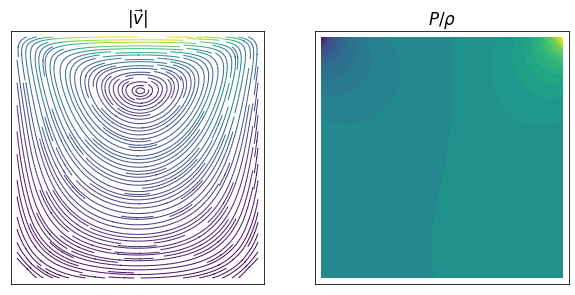

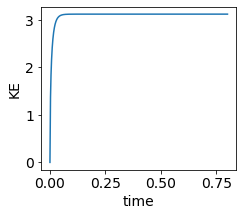

In [41]:
X,Y = np.meshgrid(x,y)

plt.rc('font', size=14)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

ax1.set_aspect('equal', adjustable='box')
ax1.streamplot(x,y,U.T,V.T, density=2.5, linewidth=1, arrowsize=0.001, color=velmag.T)
ax1.set_title(r'$|\vec{v}|$')
ax1.set_xlim([0,Lx])
ax1.set_ylim([0,Ly])
ax1.set_xticks([])
ax1.set_yticks([]);

ax2.set_aspect('equal', adjustable='box')
ax2.contourf(X,Y,P.T,40)
ax2.set_title(r'$P/\rho$')
ax2.set_xlim([0,Lx])
ax2.set_ylim([0,Ly])
ax2.set_xticks([])
ax2.set_yticks([]);

plt.figure(figsize=(3.5,3))
plt.plot(times,ke)
plt.xlabel('time')
plt.ylabel('KE');

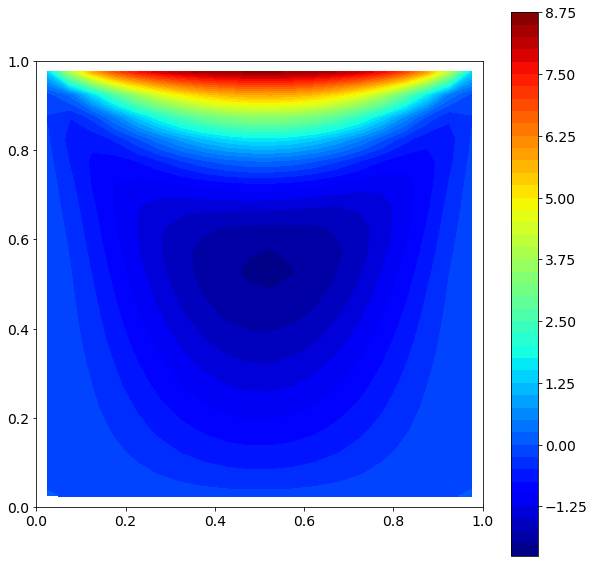

In [42]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
ax1.set_aspect('equal', adjustable='box')
img=ax1.contourf(X,Y,U.T,50, cmap='jet')
fig.colorbar(img)
ax1.set_xlim([0,Lx])
ax1.set_ylim([0,Ly])

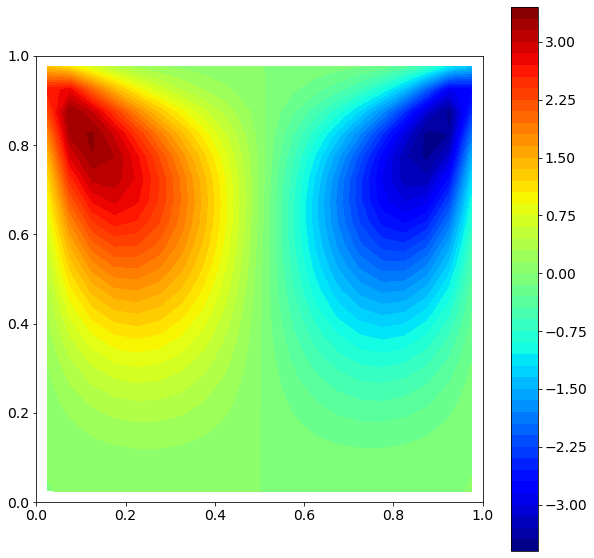

In [43]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
ax1.set_aspect('equal', adjustable='box')
img=ax1.contourf(X,Y,V.T,50, cmap='jet')
fig.colorbar(img)
ax1.set_xlim([0,Lx])
ax1.set_ylim([0,Ly])

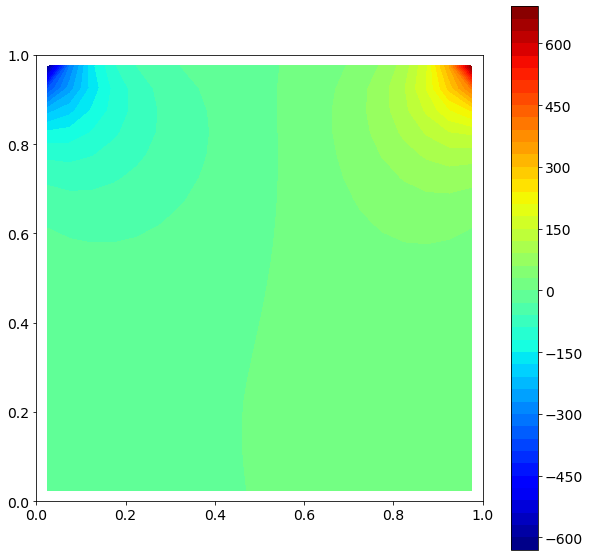

In [44]:
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
ax1.set_aspect('equal', adjustable='box')
img=ax1.contourf(X,Y,P.T,50, cmap='jet')
fig.colorbar(img)
ax1.set_xlim([0,Lx])
ax1.set_ylim([0,Ly])

In [45]:
np.min(P), np.max(P)

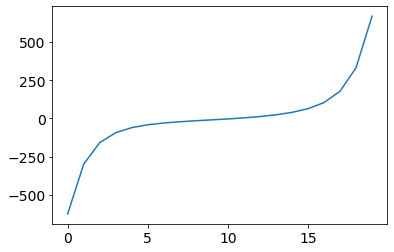

In [57]:
plt.plot(P[:,-1])
#plt.ylim([-30,30])